In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:

df = pd.read_csv("fraud_reduced.csv", index_col=0)

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33, stratify=y)

In [4]:

param_grid = {
    'n_estimators': [50, 60],
    'learning_rate': [0.1],
    'algorithm': ['SAMME']
}

rnd_clf = AdaBoostClassifier()
param_search = GridSearchCV(
    rnd_clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=None),  # Cross-validation strategy
    n_jobs=1,  # Use all available CPU cores
    scoring = make_scorer(roc_auc_score),
    verbose=2
)



param_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=  17.4s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=  17.8s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=  17.1s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=  17.1s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=  17.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=60; total time=  21.5s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=60; total time=  20.9s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=60; total time=  20.8s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=60; total time=  21.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=60; total time=  20.7s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'algorithm': ['SAMME'], 'learning_rate': [0.1],
                         'n_estimators': [50, 60]},
             scoring=make_scorer(roc_auc_score), verbose=2)

In [5]:
param_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 60}

In [6]:
cvres = param_search.cv_results_
results = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_score"], cvres["params"])]
results.sort(reverse=True, key=lambda x: x[0])
for mean_score, params in results:
    print("ROC AUC", mean_score, "-", "Parameters:", params)

ROC AUC 0.8029568083586666 - Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 60}
ROC AUC 0.7787143841162425 - Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}


In [7]:
param_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=60)

In [8]:
clf_rnd = param_search.best_estimator_

In [9]:
clf_rnd = param_search.best_estimator_

In [10]:
y_pred = clf_rnd.predict(X_test)

[[93810    15]
 [   75    87]]


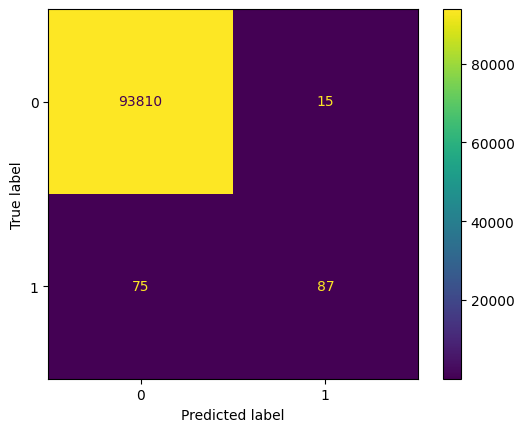

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rnd.classes_)
disp.plot()

In [12]:
y_pred = clf_rnd.predict(X_test)

# Calculate and display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.85      0.54      0.66       162

    accuracy                           1.00     93987
   macro avg       0.93      0.77      0.83     93987
weighted avg       1.00      1.00      1.00     93987



In [13]:
import joblib

joblib.dump(value= clf_rnd, filename='AdaBoost.pkl')

['AdaBoost.pkl']